In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
country = "France"
location_level = "department"

In [30]:
df_dv_a = pd.read_csv(f"data_output/{country}/2017_divisiveness_{location_level}.csv.gz", compression="gzip")
df_dv_a = df_dv_a.groupby(location_level).agg({"value": "mean"}).reset_index()
df_dv_b = pd.read_csv(f"data_output/{country}/2022_divisiveness_{location_level}.csv.gz", compression="gzip")
df_dv_b = df_dv_b.groupby(location_level).agg({"value": "mean"}).reset_index()

In [33]:
df_dv = pd.merge(df_dv_a, df_dv_b, on=location_level)
df_dv["diff"] = df_dv["value_y"] - df_dv["value_x"]
df_dv

,department,value_x,value_y,diff
0,Ain,0.041324,0.030982,-0.010342
1,Aisne,0.049418,0.037166,-0.012252
2,Allier,0.039349,0.030995,-0.008354
3,Alpes-Maritimes,0.034086,0.038077,0.003991
4,Alpes-de-Haute-Provence,0.048433,0.037870,-0.010563
...,...,...,...,...
102,Vienne,0.043159,0.032443,-0.010716
103,Vosges,0.050413,0.037183,-0.013230
104,Wallis et Futuna,NaN,NaN,NaN
105,Yonne,0.045544,0.036637,-0.008907


In [72]:
df_location_a = pd.read_csv(f"data_output/{country}/2017_first_round_location.csv.gz", compression="gzip")
#df_location_a = df_location_a[["polling_id", location_level]]
df_location_b = pd.read_csv(f"data_output/{country}/2022_first_round_location.csv.gz", compression="gzip")
#df_location_b = df_location_b[["polling_id", location_level]]

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
df_tmp_a = df_location_a.groupby(location_level).agg({"electors": "sum", "abstentions": "sum"})
df_tmp_a["rate"] = df_tmp_a["abstentions"] / df_tmp_a["electors"]
df_tmp_a = df_tmp_a.reset_index()

df_tmp_b = df_location_b.groupby(location_level).agg({"electors": "sum", "abstentions": "sum"})
df_tmp_b["rate"] = df_tmp_b["abstentions"] / df_tmp_b["electors"]
df_tmp_b = df_tmp_b.reset_index()

In [102]:
df_a = pd.read_csv(f"data_output/{country}/2017_runoff.csv.gz", compression="gzip")
df_a = pd.merge(df_a, df_location_a[["polling_id", location_level]], on="polling_id")
df_b = pd.read_csv(f"data_output/{country}/2022_runoff.csv.gz", compression="gzip")
df_b = pd.merge(df_b, df_location_b[["polling_id", location_level]], on="polling_id")

In [111]:
df_tmp_a = df_a.groupby([location_level, "candidate"]).agg({"value": "sum"})
df_tmp_a["rate"] = df_tmp_a.groupby(level=0).apply(lambda x: x/x.sum())
df_tmp_a = df_tmp_a.reset_index()
df_tmp_a = df_tmp_a.pivot(index=location_level, columns="candidate", values="rate")
df_tmp_a["value"] = df_tmp_a["Emmanuel MACRON"] - df_tmp_a["Marine LE PEN"]

df_tmp_b = df_b.groupby([location_level, "candidate"]).agg({"value": "sum"})
df_tmp_b["rate"] = df_tmp_b.groupby(level=0).apply(lambda x: x/x.sum())
df_tmp_b = df_tmp_b.reset_index()
df_tmp_b = df_tmp_b.pivot(index=location_level, columns="candidate", values="rate")
df_tmp_b["value"] = df_tmp_b["Emmanuel MACRON"] - df_tmp_b["Marine LE PEN"]


In [112]:
df_tmp_b

candidate,Emmanuel MACRON,Marine LE PEN,value
department,,,
Ain,0.546995,0.453005,0.093990
Aisne,0.421548,0.578452,-0.156904
Allier,0.523152,0.476848,0.046304
Alpes-Maritimes,0.501156,0.498844,0.002312
Alpes-de-Haute-Provence,0.500870,0.499130,0.001739
...,...,...,...
Vienne,0.589362,0.410638,0.178725
Vosges,0.479947,0.520053,-0.040106
Wallis et Futuna,0.674472,0.325528,0.348944


In [114]:
df_tmp = pd.merge(df_tmp_a, df_tmp_b, on=location_level)
df_tmp["diff_rate"] = df_tmp["value_y"] - df_tmp["value_x"]
df_tmp

candidate,Emmanuel MACRON_x,Marine LE PEN_x,value_x,Emmanuel MACRON_y,Marine LE PEN_y,value_y,diff_rate
department,,,,,,,
Ain,0.648995,0.351005,0.297990,0.546995,0.453005,0.093990,-0.204000
Aisne,0.545462,0.454538,0.090924,0.421548,0.578452,-0.156904,-0.247828
Allier,0.685712,0.314288,0.371425,0.523152,0.476848,0.046304,-0.325121
Alpes-Maritimes,0.584966,0.415034,0.169932,0.501156,0.498844,0.002312,-0.167620
Alpes-de-Haute-Provence,0.620208,0.379792,0.240417,0.500870,0.499130,0.001739,-0.238677
...,...,...,...,...,...,...,...
Vienne,0.758938,0.241062,0.517876,0.589362,0.410638,0.178725,-0.339151
Vosges,0.627816,0.372184,0.255632,0.479947,0.520053,-0.040106,-0.295738
Wallis et Futuna,0.791373,0.208627,0.582746,0.674472,0.325528,0.348944,-0.233802


In [115]:
df = pd.merge(df_tmp, df_dv, on=location_level)
overseas = ["Guadeloupe", "Martinique", "Guyane", "La Réunion", "Mayotte", "Saint-Martin/Saint-Barthélemy",
           "Saint-Pierre-et-Miquelon", "Polynésie française", "Français établis hors de France", "Nouvelle-Calédonie", "Wallis et Futuna",
           "Corse-du-Sud", "Haute-Corse"]
df = df[~df[location_level].isin(overseas)]
df

,department,Emmanuel MACRON_x,Marine LE PEN_x,value_x_x,Emmanuel MACRON_y,Marine LE PEN_y,value_y_x,diff_rate,value_x_y,value_y_y,diff
0,Ain,0.648995,0.351005,0.297990,0.546995,0.453005,0.093990,-0.204000,0.041324,0.030982,-0.010342
1,Aisne,0.545462,0.454538,0.090924,0.421548,0.578452,-0.156904,-0.247828,0.049418,0.037166,-0.012252
2,Allier,0.685712,0.314288,0.371425,0.523152,0.476848,0.046304,-0.325121,0.039349,0.030995,-0.008354
3,Alpes-Maritimes,0.584966,0.415034,0.169932,0.501156,0.498844,0.002312,-0.167620,0.034086,0.038077,0.003991
4,Alpes-de-Haute-Provence,0.620208,0.379792,0.240417,0.500870,0.499130,0.001739,-0.238677,0.048433,0.037870,-0.010563
...,...,...,...,...,...,...,...,...,...,...,...
101,Vendée,0.732017,0.267983,0.464034,0.614808,0.385192,0.229616,-0.234417,0.033536,0.027138,-0.006398
102,Vienne,0.758938,0.241062,0.517876,0.589362,0.410638,0.178725,-0.339151,0.043159,0.032443,-0.010716
103,Vosges,0.627816,0.372184,0.255632,0.479947,0.520053,-0.040106,-0.295738,0.050413,0.037183,-0.013230
105,Yonne,0.635247,0.364753,0.270493,0.491956,0.508044,-0.016087,-0.286580,0.045544,0.036637,-0.008907


In [98]:
df.sort_values("rate_y")

,department,electors_x,abstentions_x,rate_x,electors_y,abstentions_y,rate_y,diff_rate,value_x,value_y,diff
33,Gers,144959,23027,0.158852,147278,28267,0.191930,0.033078,0.053207,0.037144,-0.016063
60,Lot,136322,22347,0.163928,139278,27164,0.195034,0.031106,0.041367,0.032218,-0.009149
62,Lozère,59508,9949,0.167188,59812,11680,0.195279,0.028091,0.062163,0.044162,-0.018000
39,Haute-Garonne,906653,170785,0.188369,930321,183366,0.197100,0.008731,0.047220,0.042078,-0.005142
55,Landes,310197,55411,0.178632,329337,65654,0.199352,0.020720,0.038285,0.028848,-0.009437
...,...,...,...,...,...,...,...,...,...,...,...
1,Aisne,375752,80183,0.213393,373544,101089,0.270621,0.057228,0.049418,0.037166,-0.012252
12,Bouches-du-Rhône,1372394,300146,0.218703,1411184,383816,0.271982,0.053279,0.046408,0.045581,-0.000827
72,Moselle,751271,177500,0.236266,745914,210299,0.281935,0.045668,0.048738,0.040220,-0.008518
74,Nord,1804668,417073,0.231108,1813906,514033,0.283385,0.052277,0.052112,0.047604,-0.004507


In [116]:
df.corr()

,Emmanuel MACRON_x,Marine LE PEN_x,value_x_x,Emmanuel MACRON_y,Marine LE PEN_y,value_y_x,diff_rate,value_x_y,value_y_y,diff
Emmanuel MACRON_x,1.000000,-1.000000,1.000000,0.919144,-0.919144,0.919144,-0.181418,-0.242166,-0.160670,0.215437
Marine LE PEN_x,-1.000000,1.000000,-1.000000,-0.919144,0.919144,-0.919144,0.181418,0.242166,0.160670,-0.215437
value_x_x,1.000000,-1.000000,1.000000,0.919144,-0.919144,0.919144,-0.181418,-0.242166,-0.160670,0.215437
Emmanuel MACRON_y,0.919144,-0.919144,0.919144,1.000000,-1.000000,1.000000,0.220634,-0.252819,-0.052860,0.354064
Marine LE PEN_y,-0.919144,0.919144,-0.919144,-1.000000,1.000000,-1.000000,-0.220634,0.252819,0.052860,-0.354064
value_y_x,0.919144,-0.919144,0.919144,1.000000,-1.000000,1.000000,0.220634,-0.252819,-0.052860,0.354064
diff_rate,-0.181418,0.181418,-0.181418,0.220634,-0.220634,0.220634,1.000000,-0.031545,0.265862,0.350478
value_x_y,-0.242166,0.242166,-0.242166,-0.252819,0.252819,-0.252819,-0.031545,1.000000,0.799155,-0.737091
value_y_y,-0.160670,0.160670,-0.160670,-0.052860,0.052860,-0.052860,0.265862,0.799155,1.000000,-0.182814
diff,0.215437,-0.215437,0.215437,0.354064,-0.354064,0.354064,0.350478,-0.737091,-0.182814,1.000000


<AxesSubplot:xlabel='rate_y', ylabel='value_y'>

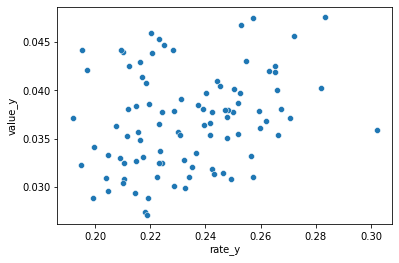

In [101]:
sns.scatterplot(x="rate_y", y="value_y", data=df)